In [25]:
!pip install wget
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import wget

In [26]:
file = 'EnergiaPotencialGas2D'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EnergiaPotencialGas2D.txt'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Descargado')
else:
    Path_ = file

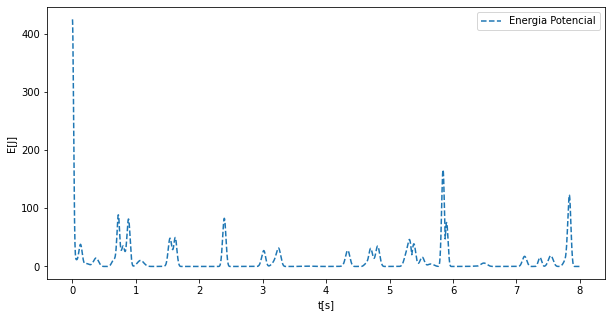

In [27]:
data = np.loadtxt(Path_)
time = data[:,0]
p_energy = data[:,1]

p_energy_mean = p_energy - np.mean(p_energy)
fig = plt.figure(figsize=(10,5))
plt.xlabel("t[s]")
plt.ylabel("E[J]")
plt.plot(time, p_energy, "--", label = "Energia Potencial")
plt.legend()

<StemContainer object of 3 artists>

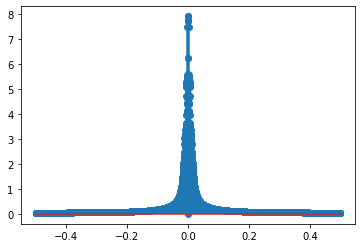

In [28]:
 fft = np.fft.fft(p_energy_mean)
ffta = np.abs(fft)
N = len(p_energy_mean)
freq = np.fft.fftfreq(N)
plt.stem(freq, 2*ffta/N, use_line_collection = True)

<StemContainer object of 3 artists>

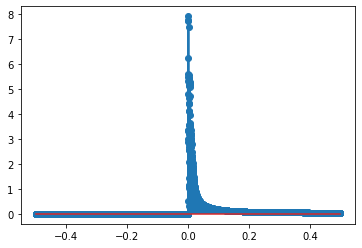

In [29]:
mask = freq < 0
fft_1 = fft.copy()
fft_1[mask] = 0
ffta_1 = np.abs(fft_1)
plt.stem(freq, 2*ffta_1/N, use_line_collection = True)

In [30]:
#Frecuencia dominante o fundamental
ii = np.argmax(ffta_1)
ffundamental = freq[ii]
T = (1./ffundamental) #Tiempo de vida media

In [31]:
i = np.abs(freq) > ffundamental
i_1 = np.abs(freq) < ffundamental

In [32]:
fft[i | i_1] = 0. #Se le pone la máscara al vector de la transformada de Fourier
ffta_f = np.abs(fft) #Se saca la norma (solo para verificar nuestro espectro de frecuencias)

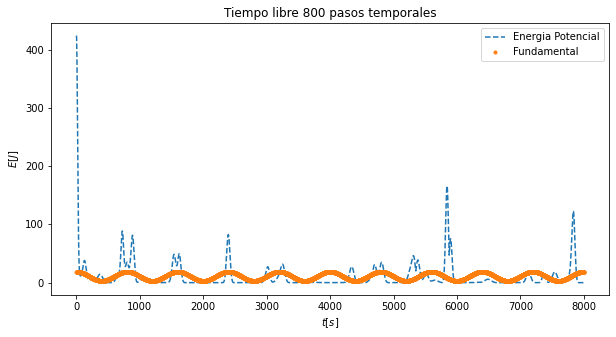

In [33]:
fft_inv = np.fft.ifft(fft)
p_energy_fundamental = np.real(fft_inv)

fig = plt.figure(figsize=(10, 5))
plt.title("Tiempo libre 800 pasos temporales")
plt.xlabel("$t[s]$")
plt.ylabel("$E[J]$")
plt.plot(time*1000, p_energy, "--", label = "Energia Potencial")
plt.plot(time*1000, p_energy_fundamental + np.mean(p_energy), ".", label = "Fundamental")
plt.legend()
